# E-Commerce Data Analysis using pandas :-


#### Source of dataset :- https://www.kaggle.com/carrie1/ecommerce-data


## About Dataset :-

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers."

Analyses for this dataset could include time series, clustering, classification and more.


<img src='dataset/E-com.jpg' height='400' width='800'>

### All Column Names and its Description:-

InvoiceNo : A number assigned to each transaction

StockCode : Product code

Description:Product name

Quantity  : Number of products purchased for each transaction

InvoiceDate:Timestamp for each transaction

UnitPrice : Product price per unit

CustomerID :Unique identifier each customer

Country :   Country name

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset/E_data.csv",encoding="cp1252")   #(encoding=latin)

In [3]:
# display first 2 record
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


### Basic information about dataset:-

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Numeric details of dataset:-

In [5]:
df.describe().round(2)          # round use to set how many digit display after decimal

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


###### 1. InvoiceDate column converts string format into datetime format?

In [6]:
df=pd.read_csv("dataset/E_data.csv",parse_dates=["InvoiceDate"],encoding="latin")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


###### 2. How to find out total no. of records


In [8]:
print("Total number of records=",df.shape[0])

Total number of records= 541909


In [9]:
print("Number of Records=",len(df.index))

Number of Records= 541909


###### 3. How to find out total no. of columns?

In [10]:
print("Total number of records=",df.shape[1])

Total number of records= 8


In [11]:
print("Number of Columns=",len(df.columns))

Number of Columns= 8


###### 4. Display all column names ?


In [12]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [13]:
df.columns.to_list()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

###### 5. How to find out all missing values for each columns?


In [14]:
# check null value or not
print("Any Missing Value?",df.isnull().values.any())

Any Missing Value? True


In [15]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

###### 6. First Show all Quantity has negative values records?


In [16]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


###### 7. Then find out total shape of Quantity has negative values records?


In [17]:
print("Number of negative records in quantity=",df[df['Quantity'] < 0].shape[0])

Number of negative records in quantity= 10624


###### 8. How to remove all Quantity records with negative values?


In [18]:
df_new=df[~(df["Quantity"]<0)].reset_index(drop=True)    # ~ Tilde's sign(not symbol)

###### 9. Then find out total records shape ? 


In [19]:
df_new.shape[0]

531285

###### 10. After UnitPrice column insert new column Amount_Spent & also formula assigned?

In [20]:
df_new.insert(6, 'Amount_Spent', df_new['Quantity'] * df_new['UnitPrice'])

In [21]:
df_new.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,20.34,17850.0,United Kingdom


###### 11. We add a few columns after InvoiceDate that consist of the Year, Month, Day and Hour for each transaction for analysis work.

In [22]:
df_new.insert(5, 'Invoice_Year',df_new.InvoiceDate.dt.year)
df_new.insert(6, 'Invoice_Month',df_new.InvoiceDate.dt.month)
df_new.insert(7, 'Invoice_Day',df_new.InvoiceDate.dt.day)
df_new.insert(8, 'Invoice_Hour',df_new.InvoiceDate.dt.hour)

In [23]:
df_new.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,UnitPrice,Amount_Spent,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2010,12,1,8,2.55,15.30,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,2010,12,1,8,3.39,20.34,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2010,12,1,8,2.75,22.00,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,2010,12,1,8,3.39,20.34,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,2010,12,1,8,3.39,20.34,17850.0,United Kingdom


###### 12.How to find out Top 5 customers with highest money spent records? Show Only 3 columns ['CustomerID','Country','Amount_Spent']

In [24]:
df_new.sort_values("Amount_Spent",ascending=False)[:5][["CustomerID","Country","Amount_Spent"]]

,CustomerID,Country,Amount_Spent
529804,16446.0,United Kingdom,168469.60
60479,12346.0,United Kingdom,77183.60
217959,15098.0,United Kingdom,38970.00
14794,NaN,United Kingdom,13541.33
293620,NaN,United Kingdom,11062.06


In [25]:
df_new.sort_values("Amount_Spent",ascending=False).head(5)[["CustomerID","Country","Amount_Spent"]]

,CustomerID,Country,Amount_Spent
529804,16446.0,United Kingdom,168469.60
60479,12346.0,United Kingdom,77183.60
217959,15098.0,United Kingdom,38970.00
14794,NaN,United Kingdom,13541.33
293620,NaN,United Kingdom,11062.06


###### 13.Plotting bar chart : How many orders (per month)?

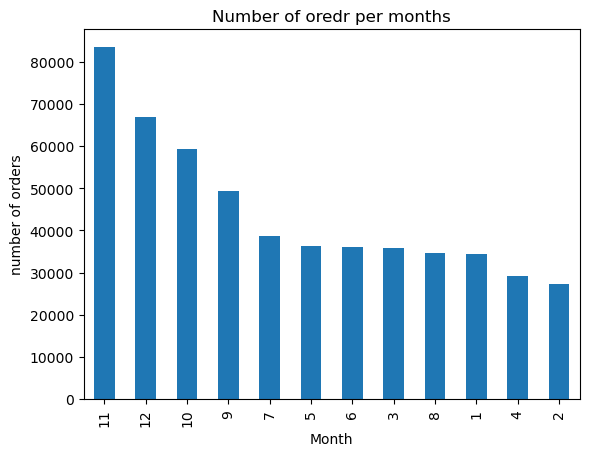

In [26]:
plt.xlabel("Month")
plt.ylabel("number of orders")
plt.title("Number of oredr per months")
df_new['Invoice_Month'].value_counts().plot(kind='bar')
plt.show()

###### 14. Plotting bar chart : How many orders (per day)?

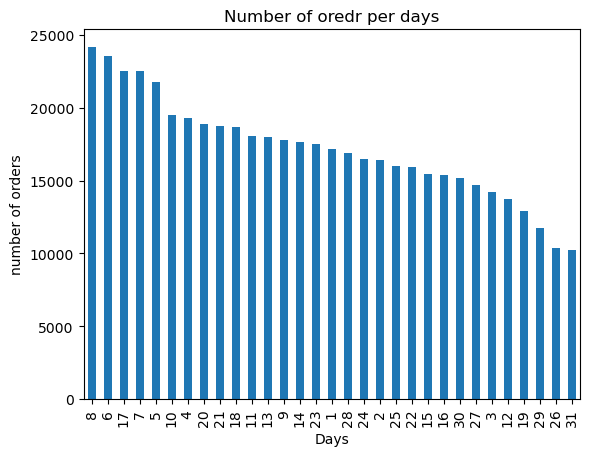

In [27]:
plt.xlabel("Days")
plt.ylabel("number of orders")
plt.title("Number of oredr per days")
df_new['Invoice_Day'].value_counts().plot(kind='bar')
plt.show()

###### 15. Plotting bar chart : How many orders (per hour)?

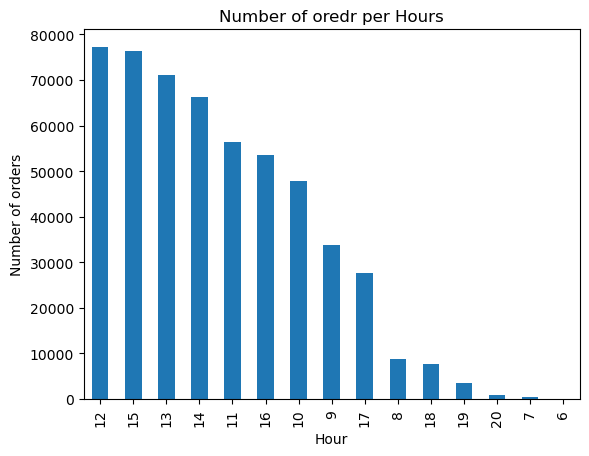

In [28]:
plt.xlabel("Hour")
plt.ylabel("Number of orders")
plt.title("Number of oredr per Hours")
df_new['Invoice_Hour'].value_counts().plot(kind='bar')
plt.show()

###### Number of unique StockCodes in the dataset?


In [29]:
df.StockCode.nunique()

4070

###### What is the range of dates covered in the dataset?


In [30]:
start = df['InvoiceDate'].min()
last = df['InvoiceDate'].max()
print("Range=",(start,last))


Range= (Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))


###### How many unique customers are there?

In [31]:
print("Number of unique customer=",df["CustomerID"].nunique())

Number of unique customer= 4372


###### What is the average quantity of items per invoice?

In [34]:
df.groupby("InvoiceNo")["Quantity"].mean().mean()  #df.groupby('InvoiceNo')['Quantity'].mean() calculates the mean quantity for each invoice, and the subsequent .mean() calculates the overall mean of these averages.

12.847258350544973

###### What is the total amount spent on each invoice?

###### Heighest Sales invoiceno

In [ ]:
df_new.sort_values(by="Amount_Spent",ascending=False)[:1]

###### Most valuable customer:-

In [ ]:
# Maximum amount spent by a single customerid
df_new.groupby("CustomerID")["Amount_Spent"].sum().max()

In [ ]:
print("Most valuable customer whose CustomerID =",df_new.groupby("CustomerID")["Amount_Spent"].sum().idxmax())

###### Find out total  number of record which have negative unitprice?


In [ ]:
df[df['UnitPrice'] < 0]

###### Which month had the highest total sales?


In [ ]:
df_new.groupby("Invoice_Month")["Amount_Spent"].sum().idxmax()
#df.groupby("Invoice_Month")["Amount_Spent"].sum().max()

###### What is the average unit price of items in the dataset?


In [ ]:
print("Average unit price of each item =",df_new.Amount_Spent.sum()/df_new.Quantity.sum())
     ########################################################################################################################
print("Average unit price of each item=",df_new.UnitPrice.mean())


###### Which product has the highest total sales (amount spent)?


In [ ]:
df_new.groupby("Description")["Amount_Spent"].sum().max()


###### Which product highest sell in the month of April?

In [ ]:
df[df['InvoiceDate'].dt.month == 4].groupby("Description")["Amount_Spent"].sum().idxmax()


###### How many unique products are there?


In [ ]:
df["Description"].nunique()

###### What is the average quantity sold per product in the month of December?


In [ ]:
df[df['Invoice_Month'] == 12].groupby('Description')['Quantity'].mean()


In [ ]:
# only december 2010 
dec2010 = df[(df['Invoice_Month'] == 12) & (df['Invoice_Year']== 2010)]
dec2010.groupby('Description')['Quantity'].mean()


In [ ]:
# What are the top 5 customers based on the total amount spent?
df.groupby('CustomerID')['Amount_Spent'].sum().sort_values(ascending=False).head()


In [ ]:
# based on year 2010
df[df['Invoice_Year']== 2010].groupby('CustomerID')['Amount_Spent'].sum().sort_values(ascending=False).head()

###### What is the total sales amount for each country?

In [ ]:
df.groupby('Country')["Amount_Spent"].sum()

###### Which country has the highest total sales?


In [ ]:
df.groupby('Country')["Amount_Spent"].sum().idxmax()

###### What is the busiest hour in terms of the number of invoices?


In [ ]:
df["Invoice_Hour"].value_counts().idxmax()

######  Which days of week heighest sell?

In [ ]:
df.groupby(df['InvoiceDate'].dt.day_name())['Amount_Spent'].sum().sort_values(ascending=False)

In [ ]:
df.head(1)

###### How many customers made a single purchase?


In [ ]:
(df['CustomerID'].value_counts() == 1).shape[0]
                                   #######################3333